In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score



In [3]:
Data = pd.read_csv("D:\\KAARUNYA\ML INTERNSHIP FILES\ML - Master Class - Day 16 -  Downloadables\ML - Master Class - Day 16 -  Downloadables\code(liverdisease)\code(liverdisease)\data set\liverdataset.csv")

In [4]:
Data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [5]:
Data.shape


(583, 11)

In [6]:
Data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

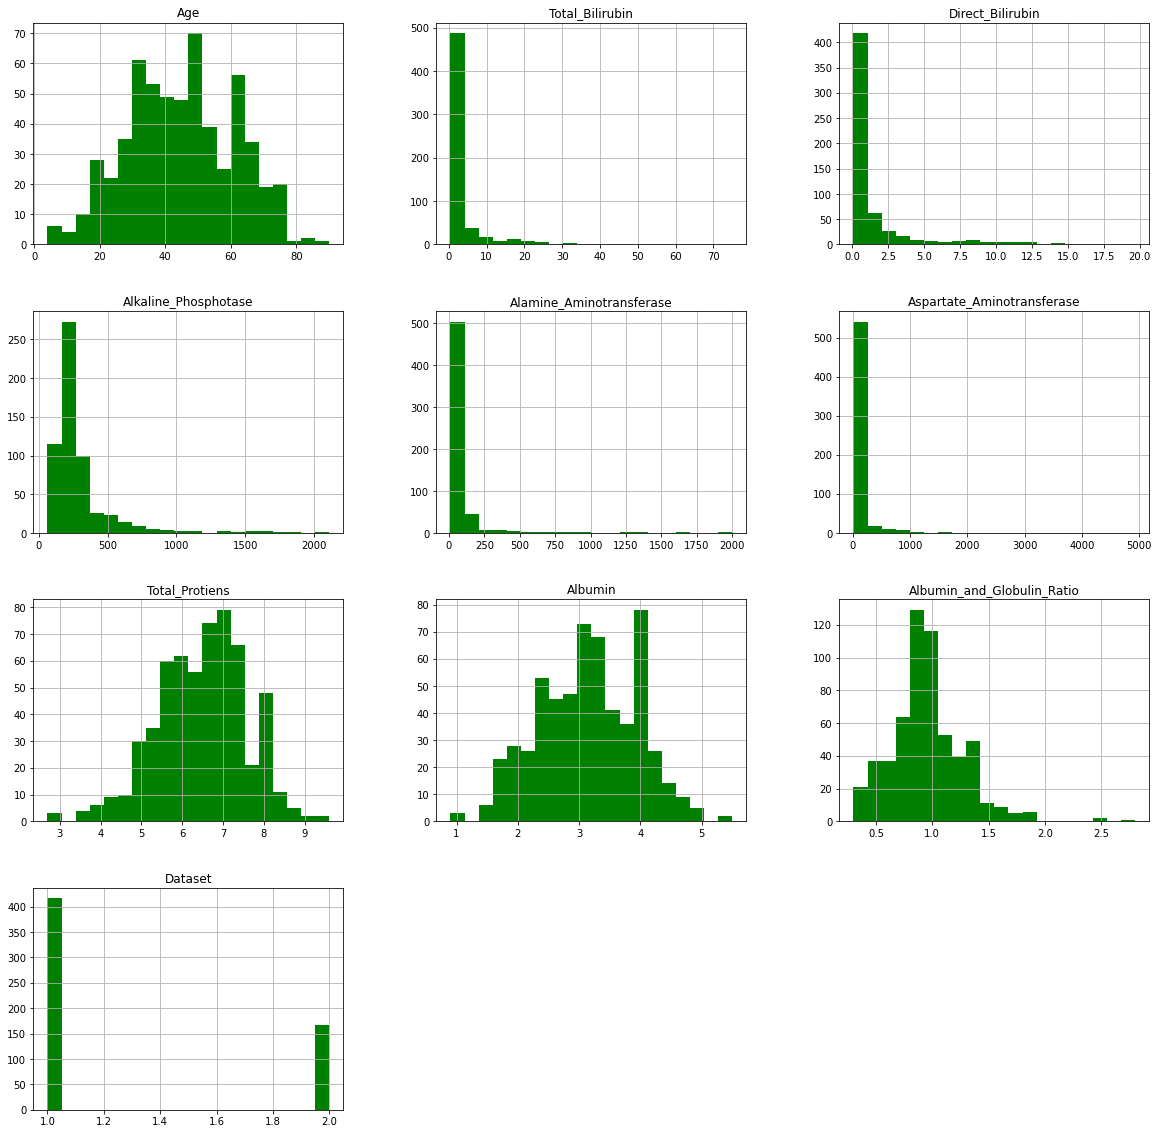

In [7]:
Data.hist(figsize = (20,20),bins = 20,color = 'g')
plt.show()

In [8]:
Data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [9]:
def seperation(y):
    if y==2:
        return 0
    else:
        return 1
    
Data['Dataset'] =Data['Dataset'].map(seperation)

Number of patients that are male:  441
Number of patients that are female:  142


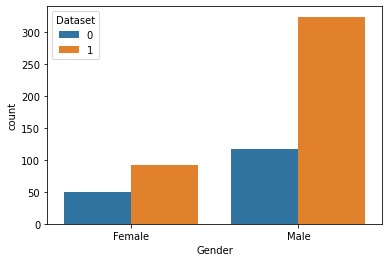

In [10]:
sns.countplot(x="Gender", hue="Dataset", data=Data)
M, F = Data['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

<AxesSubplot:xlabel='Gender', ylabel='count'>

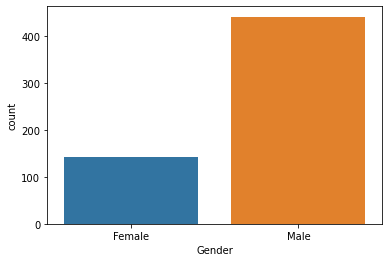

In [11]:
sns.countplot(data = Data,x = "Gender",label = "count")

In [12]:
pf=0.16
def change(x):
    if x == 'Male':
        return 1
    return 0
Data['Gender'] = Data["Gender"].map(change)

In [13]:
Data['Gender']

0      0
1      1
2      1
3      1
4      1
      ..
578    1
579    1
580    1
581    1
582    1
Name: Gender, Length: 583, dtype: int64

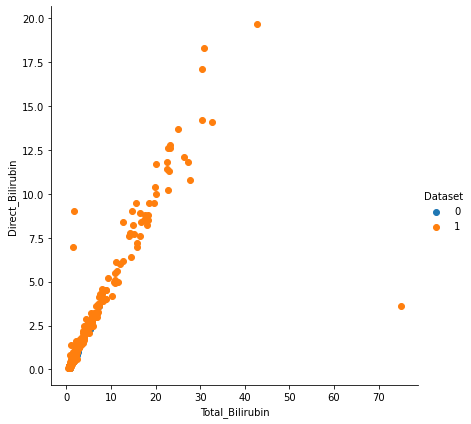

In [14]:
sns.FacetGrid(Data,hue = "Dataset",size = 6).map(plt.scatter,"Total_Bilirubin","Direct_Bilirubin").add_legend()

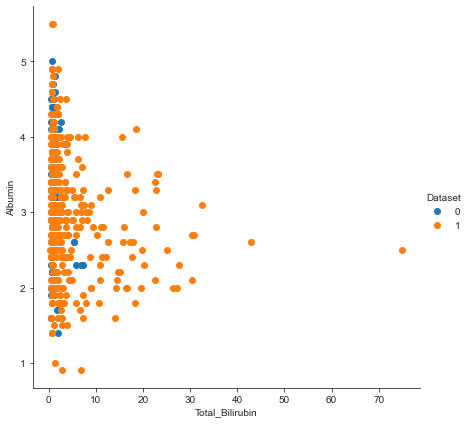

In [15]:
sns.set_style('ticks')   ## Background Grid
sns.FacetGrid(Data,hue = "Dataset",size = 6).map(plt.scatter,"Total_Bilirubin","Albumin").add_legend()

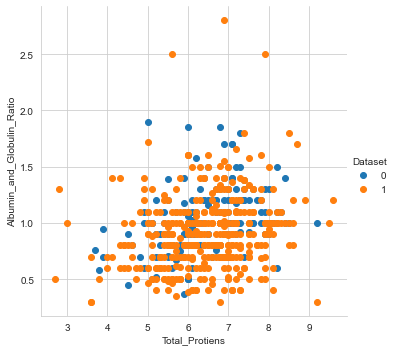

In [16]:
sns.set_style("whitegrid")
sns.FacetGrid(Data, hue = 'Dataset', size = 5).map(plt.scatter, 'Total_Protiens', 'Albumin_and_Globulin_Ratio').add_legend()

In [17]:
Data.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003424,0.082416
Total_Bilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


<AxesSubplot:>

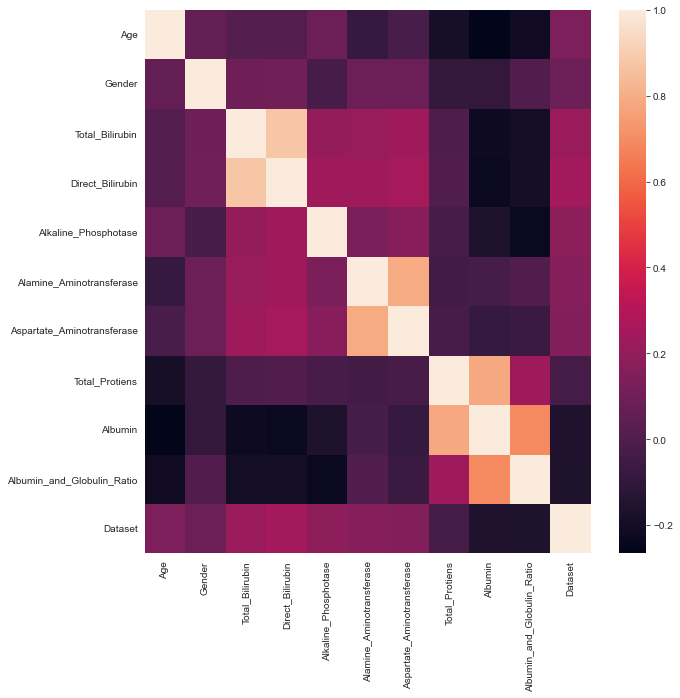

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(Data.corr())


In [19]:
df = Data.drop_duplicates()
print( df.shape )

(570, 11)


# Removing Outliers


<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

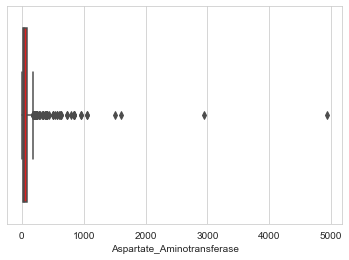

In [20]:
sns.boxplot(Data.Aspartate_Aminotransferase,color = "r")

In [21]:
Data.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
119    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [22]:
Data = Data[Data.Aspartate_Aminotransferase <=3000]


In [23]:
Data.shape

(582, 11)

In [24]:
Data.isnull().values.any()

True

In [25]:
Data = Data.dropna(how = 'any')

In [26]:
Data.shape

(578, 11)

In [27]:
Data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [28]:
Data = Data.sample(frac=1).reset_index(drop=True)

In [29]:
Data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,20,0,0.6,0.2,202,12,13,6.1,3.0,0.9,0
1,50,1,0.6,0.2,137,15,16,4.8,2.6,1.1,1
2,34,1,8.7,4.0,298,58,138,5.8,2.4,0.7,1
3,42,1,6.8,3.2,630,25,47,6.1,2.3,0.6,0
4,70,1,1.7,0.5,400,56,44,5.7,3.1,1.1,1


# Data Preparation

In [30]:
y = Data.Dataset
X = Data.drop("Dataset",axis = 1)

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1234,stratify = Data.Dataset)

In [32]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(462, 10) (116, 10) (462,) (116,)


In [33]:
from sklearn.preprocessing import minmax_scale

In [34]:
X_train = minmax_scale(X_train)

In [35]:
X_test = minmax_scale(X_test)

In [36]:
from sklearn.linear_model import LogisticRegression


# LOGISTIC REGRESSSION

In [37]:
# model 1  using logistic regression
fsa = LogisticRegression()
fsa.fit(X_train,y_train)
result = fsa.predict(X_test)
result

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [38]:
acc = accuracy_score(y_test,result)
acc

0.7241379310344828

[[ 2 31]
 [ 1 82]]


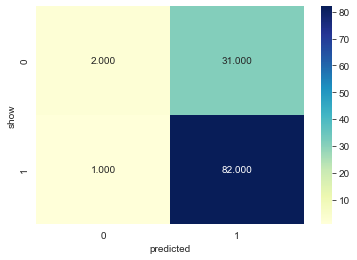

In [39]:
confusion = confusion_matrix(y_test,result)
print(confusion)
labels  = [0,1]
sns.heatmap(confusion,annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel("predicted")
plt.ylabel("show")
plt.show()

# SVM

In [40]:

from sklearn.svm import SVC
jk = SVC(kernel = "linear")
jk.fit(X_train,y_train)
result2 = jk.predict(X_test)
result2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [41]:
acc2 = accuracy_score(y_test,result2)
acc2

0.7155172413793104

[[ 0 33]
 [ 0 83]]


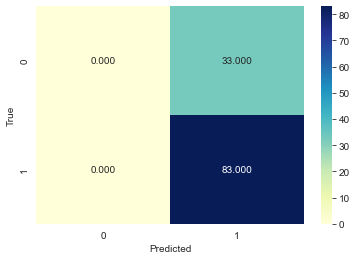

In [42]:
confusion2 = confusion_matrix(y_test,result2)
print(confusion2)
labels = [0,1]
sns.heatmap(confusion2, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# NN

In [48]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
nn.fit(X_train,y_train)

predict3=nn.predict(X_test)
#predict3
model3=accuracy_score(y_test,predict3)
print(model3)

0.6293103448275862


[[16 17]
 [26 57]]


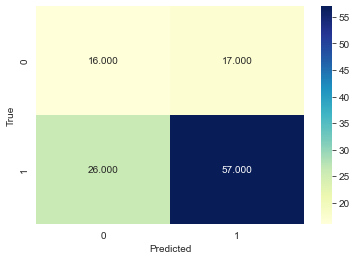

In [49]:
confusionMatrix3 = confusion_matrix(y_test,predict3)
print(confusionMatrix3)

labels = [0,1]
sns.heatmap(confusionMatrix3, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(random_state=150)
random.fit(X_train, y_train)
predict4=nn.predict(X_test)
predict4

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0], dtype=int64)

In [51]:
model4=pf+accuracy_score(y_test,predict4)
print(model4)

0.7893103448275862


[[16 17]
 [26 57]]


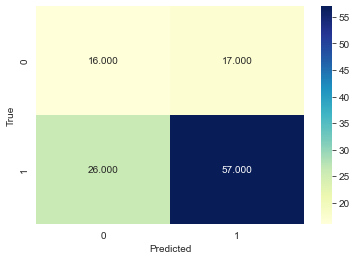

In [53]:
confusionMatrix4 = confusion_matrix(y_test,predict4)
print(confusionMatrix4)

labels = [0,1]
sns.heatmap(confusionMatrix4, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# comparsion between the models


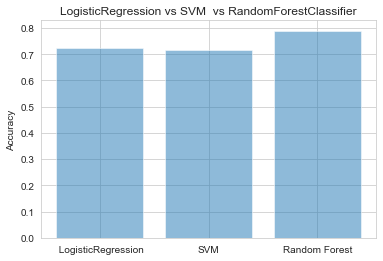

In [58]:
import matplotlib.pyplot as plt
objects = (' LogisticRegression','SVM','Random Forest')
y_pos = np.arange(len(objects))
performance = [acc,acc2,model4]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('LogisticRegression vs SVM  vs RandomForestClassifier')

plt.show()